# Multi-Model Comparison on UCI Datasets

Now let's compare multiple machine learning models on Child, Adolescent, and Adult datasets to find the best performing model for each age group.

In [16]:
# Load all UCI datasets and Saudi Arabia toddler dataset
datasets = {
    'Child': r'e:\Users\Prajj\Documents\7th Sem\RM\Datasets\UCI Dataset\UCI Child Dataset.csv',
    'Adolescent': r'e:\Users\Prajj\Documents\7th Sem\RM\Datasets\UCI Dataset\Autism-Adolescent-Data.arff',
    'Adult': r'e:\Users\Prajj\Documents\7th Sem\RM\Datasets\UCI Dataset\Autism-Adult-Data.arff',
    'Saudi_Toddler': r'e:\Users\Prajj\Documents\7th Sem\RM\Datasets\Saudi Dataset Toddlers\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv'
}

# Function to load ARFF files
from scipy.io import arff
import pandas as pd

def load_arff_as_dataframe(file_path):
    """Load ARFF file and convert to pandas DataFrame"""
    try:
        data, meta = arff.loadarff(file_path)
        df = pd.DataFrame(data)
        
        # Convert byte strings to regular strings
        for col in df.columns:
            if df[col].dtype == 'object':
                try:
                    df[col] = df[col].str.decode('utf-8')
                except:
                    pass
        return df
    except Exception as e:
        print(f"Error loading ARFF file: {e}")
        return None

# Load all datasets
loaded_datasets = {}
for name, path in datasets.items():
    print(f"Loading {name} dataset...")
    try:
        if path.endswith('.csv'):
            df = pd.read_csv(path)
        elif path.endswith('.arff'):
            df = load_arff_as_dataframe(path)
        
        if df is not None:
            loaded_datasets[name] = df
            print(f"✓ {name} dataset loaded: {df.shape}")
            print(f"  Columns: {list(df.columns)}")
            print(f"  Target distribution: {df.iloc[:, -1].value_counts().to_dict()}")
        else:
            print(f"✗ Failed to load {name} dataset")
    except Exception as e:
        print(f"✗ Error loading {name} dataset: {e}")

print(f"\nSuccessfully loaded {len(loaded_datasets)} datasets")

Loading Child dataset...
✓ Child dataset loaded: (292, 21)
  Columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
  Target distribution: {'NO': 151, 'YES': 141}
Loading Adolescent dataset...
✓ Adolescent dataset loaded: (104, 21)
  Columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
  Target distribution: {'YES': 63, 'NO': 41}
Loading Adult dataset...
✓ Adult dataset loaded: (704, 21)
  Columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'co

In [17]:
# Analyze Saudi dataset structure
if 'Saudi_Toddler' in loaded_datasets:
    saudi_df = loaded_datasets['Saudi_Toddler']
    print("Saudi Arabia Toddler Dataset Analysis:")
    print("="*50)
    print(f"Shape: {saudi_df.shape}")
    print(f"\nColumn names and types:")
    for col in saudi_df.columns:
        print(f"  {col}: {saudi_df[col].dtype}")
    
    print(f"\nFirst few rows:")
    print(saudi_df.head())
    
    print(f"\nMissing values:")
    print(saudi_df.isnull().sum())
    
    # Check for Q-CHAT questions (Q1-Q10)
    q_columns = [col for col in saudi_df.columns if col.startswith('Q') and len(col) <= 3]
    print(f"\nQ-CHAT columns found: {q_columns}")
    
    # Check target variable
    potential_targets = [col for col in saudi_df.columns if 'ASD' in col or 'autism' in col.lower() or 'class' in col.lower()]
    print(f"Potential target columns: {potential_targets}")
    
    if potential_targets:
        target_col = potential_targets[0]
        print(f"\nTarget variable '{target_col}' distribution:")
        print(saudi_df[target_col].value_counts())
        
    print("\n" + "="*50)

Saudi Arabia Toddler Dataset Analysis:
Shape: (506, 17)

Column names and types:
  A10: int64
  A9: int64
  A8: int64
  A7: int64
  A6: int64
  A5: int64
  A4: int64
  A3: int64
  A2: int64
  A1: int64
  Region: object
  Family member with ASD history: object
  Who is completing the test: object
  Age: int64
  Gender: object
  Screening Score: int64
  Class: int64

First few rows:
   A10  A9  A8  A7  A6  A5  A4  A3  A2  A1            Region  \
0    0   0   1   1   1   0   0   0   0   0   Makkah Province   
1    0   0   1   0   0   1   0   1   0   0   Makkah Province   
2    0   0   0   1   0   0   0   0   0   0   Makkah Province   
3    0   0   0   0   0   0   0   0   0   0   Makkah Province   
4    0   0   0   0   0   0   0   0   0   0  Eastern Province   

  Family member with ASD history Who is completing the test  Age  Gender  \
0                             No              Family member   32  Female   
1                             No              Family member   30  Female   
2  

In [18]:
# Define models to compare
models_to_compare = {
    'SVM (RBF)': SVC(random_state=42, probability=True),
    'SVM (Linear)': SVC(kernel='linear', random_state=42, probability=True),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

print("Models to compare:")
for i, model_name in enumerate(models_to_compare.keys(), 1):
    print(f"{i}. {model_name}")

# Function to calculate specificity
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp) if (tn + fp) > 0 else 0.0

Models to compare:
1. SVM (RBF)
2. SVM (Linear)
3. Random Forest
4. Logistic Regression
5. Gradient Boosting
6. Naive Bayes
7. K-Nearest Neighbors
8. Decision Tree


In [22]:
# Function to preprocess any dataset
def preprocess_dataset(df, dataset_name):
    """
    Preprocess dataset with standardized column mapping
    """
    print(f"\nPreprocessing {dataset_name} dataset...")
    df_processed = df.copy()
    
    # Print initial column info for debugging
    print(f"Original columns: {list(df_processed.columns)}")
    
    # Standardize column names based on common patterns
    column_mapping = {}
    
    # Map target column - handle different naming conventions
    target_candidates = ['Class/ASD', 'class/ASD', 'autism', 'asd_traits', 'classification', 'ASD_traits', 'Class']
    target_found = False
    
    for col in df_processed.columns:
        col_lower = col.lower()
        if any(target in col_lower for target in ['class', 'asd', 'autism']) and not target_found:
            if col != 'Class/ASD':  # Don't remap if already correct
                column_mapping[col] = 'Class/ASD'
                target_found = True
            else:
                target_found = True
            break
    
    # Handle Saudi dataset specific column mappings
    if dataset_name == 'Saudi_Toddler':
        # Map Saudi-specific columns to standard names
        saudi_mapping = {
            'Screening Score': 'result',  # Total screening score
            'Gender': 'gender',
            'Family member with ASD history': 'austim',
            'Who is completing the test': 'relation',
            'Class': 'Class/ASD'  # Target variable
        }
        
        for saudi_col, standard_col in saudi_mapping.items():
            if saudi_col in df_processed.columns:
                column_mapping[saudi_col] = standard_col
    
    # Apply column mapping
    if column_mapping:
        df_processed = df_processed.rename(columns=column_mapping)
        print(f"Mapped columns: {column_mapping}")
    
    # Handle missing values in age column
    if 'age' in df_processed.columns:
        age_imputer = SimpleImputer(strategy='median')
        df_processed['age'] = age_imputer.fit_transform(df_processed[['age']]).flatten()
    elif 'Age_Mons' in df_processed.columns:
        # Some datasets have age in months, convert to years
        df_processed['age'] = df_processed['Age_Mons'] / 12.0
        age_imputer = SimpleImputer(strategy='median')
        df_processed['age'] = age_imputer.fit_transform(df_processed[['age']]).flatten()
    elif 'Age' in df_processed.columns:
        # Saudi dataset uses 'Age' column, rename it to 'age'
        df_processed['age'] = df_processed['Age']
        age_imputer = SimpleImputer(strategy='median')
        df_processed['age'] = age_imputer.fit_transform(df_processed[['age']]).flatten()
    
    # Fill missing values in categorical columns
    categorical_cols = ['gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 
                       'used_app_before', 'age_desc', 'relation']
    
    for col in categorical_cols:
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].fillna('Unknown')
    
    # Fill missing values in result column
    if 'result' in df_processed.columns:
        df_processed['result'] = df_processed['result'].fillna(df_processed['result'].median())
    
    # Encode categorical variables
    label_encoders_local = {}
    for col in categorical_cols:
        if col in df_processed.columns:
            le = LabelEncoder()
            df_processed[col] = le.fit_transform(df_processed[col].astype(str))
            label_encoders_local[col] = le
    
    # Encode target variable
    if 'Class/ASD' in df_processed.columns:
        target_encoder = LabelEncoder()
        df_processed['Class/ASD'] = target_encoder.fit_transform(df_processed['Class/ASD'])
        print(f"Target classes: {target_encoder.classes_}")
    else:
        print(f"Warning: No target column found in {dataset_name}")
        print(f"Available columns after mapping: {list(df_processed.columns)}")
        target_encoder = None
    
    print(f"Processed dataset shape: {df_processed.shape}")
    print(f"Final columns: {list(df_processed.columns)}")
    return df_processed, label_encoders_local, target_encoder

In [23]:
# Function to evaluate model performance
def evaluate_model_performance(model, X_train, X_test, y_train, y_test, model_name, dataset_name):
    """
    Evaluate a single model and return performance metrics
    """
    start_time = time.time()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Get probabilities for AUC calculation
    try:
        y_test_proba = model.predict_proba(X_test)[:, 1]
    except:
        y_test_proba = None
    
    training_time = time.time() - start_time
    
    # Calculate metrics
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, zero_division=0)
    recall = recall_score(y_test, y_test_pred, zero_division=0)
    specificity = specificity_score(y_test, y_test_pred)
    
    # Calculate AUC if probabilities available
    try:
        auc = roc_auc_score(y_test, y_test_proba) if y_test_proba is not None else 0.0
    except:
        auc = 0.0
    
    # Cross-validation score
    try:
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()
        cv_std = cv_scores.std()
    except:
        cv_mean = 0.0
        cv_std = 0.0
    
    return {
        'Dataset': dataset_name,
        'Model': model_name,
        'Train_Accuracy': train_accuracy,
        'Test_Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'Specificity': specificity,
        'AUC': auc,
        'CV_Mean': cv_mean,
        'CV_Std': cv_std,
        'Training_Time': training_time,
        'Sample_Size': len(y_test)
    }

In [24]:
# Run comprehensive model comparison
results = []

for dataset_name, df in loaded_datasets.items():
    print(f"\n{'='*60}")
    print(f"PROCESSING {dataset_name.upper()} DATASET")
    print(f"{'='*60}")
    
    # Preprocess the dataset
    df_processed, label_encoders_local, target_encoder = preprocess_dataset(df, dataset_name)
    
    if target_encoder is None:
        print(f"Skipping {dataset_name} - no target column found")
        continue
    
    # Define feature columns based on dataset type
    if dataset_name == 'Saudi_Toddler':
        # Saudi dataset uses A1-A10 (without _Score suffix)
        feature_cols = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10']
    else:
        # Standard UCI datasets use A1-A10 with _Score suffix
        feature_cols = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 
                        'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']
    
    # Add additional features if available
    additional_features = ['age', 'gender', 'jundice', 'austim', 'used_app_before', 'result']
    for feat in additional_features:
        if feat in df_processed.columns:
            feature_cols.append(feat)
    
    # Check which features are actually available
    available_features = [col for col in feature_cols if col in df_processed.columns]
    print(f"Available features: {len(available_features)}/{len(feature_cols)}")
    print(f"Features: {available_features}")
    
    if len(available_features) < 10:  # At least 10 screening questions should be available
        print(f"Warning: Only {len(available_features)} features available")
        # If we don't have the main screening questions, try to find them with different naming
        if dataset_name != 'Saudi_Toddler':
            # Look for alternative column names in other datasets
            a_cols = [col for col in df_processed.columns if col.startswith('A') and col.endswith('_Score')]
            if len(a_cols) >= 10:
                feature_cols = a_cols[:10] + [feat for feat in additional_features if feat in df_processed.columns]
                available_features = [col for col in feature_cols if col in df_processed.columns]
                print(f"Using alternative features: {available_features}")
    
    if len(available_features) < 5:  # Need minimum features to proceed
        print(f"Insufficient features ({len(available_features)}) for {dataset_name}, skipping...")
        continue
    
    # Prepare data
    X = df_processed[available_features]
    y = df_processed['Class/ASD']
    
    # Check for sufficient samples and class balance
    if len(X) < 20:
        print(f"Insufficient samples ({len(X)}) for {dataset_name}, skipping...")
        continue
    
    # Check class distribution
    class_counts = np.bincount(y)
    if len(class_counts) < 2 or min(class_counts) < 2:
        print(f"Insufficient class diversity for {dataset_name}, skipping...")
        continue
    
    # Split the data
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
    except ValueError as e:
        print(f"Error splitting data for {dataset_name}: {e}")
        # Try without stratification
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42
        )
    
    # Scale features
    scaler_local = StandardScaler()
    X_train_scaled = scaler_local.fit_transform(X_train)
    X_test_scaled = scaler_local.transform(X_test)
    
    print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")
    print(f"Target distribution - Train: {np.bincount(y_train)}, Test: {np.bincount(y_test)}")
    
    # Test each model
    for model_name, model in models_to_compare.items():
        try:
            print(f"  Testing {model_name}...")
            result = evaluate_model_performance(
                model, X_train_scaled, X_test_scaled, y_train, y_test, 
                model_name, dataset_name
            )
            results.append(result)
            print(f"    Accuracy: {result['Test_Accuracy']:.4f}, AUC: {result['AUC']:.4f}")
        except Exception as e:
            print(f"    Error with {model_name}: {e}")
            
print(f"\nCompleted evaluation on {len(loaded_datasets)} datasets with {len(models_to_compare)} models")
print(f"Total results collected: {len(results)}")


PROCESSING CHILD DATASET

Preprocessing Child dataset...
Original columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
Target classes: ['NO' 'YES']
Processed dataset shape: (292, 21)
Final columns: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD']
Available features: 16/16
Features: ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'jundice', 'austim', 'used_app_before', 'result']
Training samples: 233, Test samples: 59
Target distribution - Train: [120 113], Test: [31 28]
  Testing SVM 

In [25]:
# Create comprehensive results table
results_df = pd.DataFrame(results)

if not results_df.empty:
    print("\n" + "="*100)
    print("COMPREHENSIVE MODEL COMPARISON RESULTS")
    print("="*100)
    
    # Display the full results table
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', None)
    
    print("\nDetailed Results Table:")
    print(results_df.round(4).to_string(index=False))
    
    # Find best models for each dataset
    print(f"\n{'='*60}")
    print("BEST PERFORMING MODELS BY DATASET")
    print(f"{'='*60}")
    
    dataset_performance = {}
    for dataset in results_df['Dataset'].unique():
        dataset_results = results_df[results_df['Dataset'] == dataset]
        best_accuracy = dataset_results.loc[dataset_results['Test_Accuracy'].idxmax()]
        best_auc = dataset_results.loc[dataset_results['AUC'].idxmax()]
        
        dataset_performance[dataset] = {
            'best_accuracy_model': best_accuracy['Model'],
            'best_accuracy_score': best_accuracy['Test_Accuracy'],
            'best_auc_model': best_auc['Model'],
            'best_auc_score': best_auc['AUC'],
            'sample_size': int(best_accuracy['Sample_Size'])
        }
        
        print(f"\n📊 {dataset.upper()} DATASET:")
        print(f"   Best Accuracy: {best_accuracy['Model']} ({best_accuracy['Test_Accuracy']:.4f})")
        print(f"   Best AUC: {best_auc['Model']} ({best_auc['AUC']:.4f})")
        print(f"   Sample Size: {int(best_accuracy['Sample_Size'])} test samples")
        
        # Add specific insights for Saudi dataset
        if dataset == 'Saudi_Toddler':
            print(f"   📝 Note: Saudi Arabia Toddler Dataset (Q-CHAT-10 based)")
            avg_accuracy = dataset_results['Test_Accuracy'].mean()
            print(f"   Average Accuracy across all models: {avg_accuracy:.4f}")
    
    # Overall best models
    print(f"\n{'='*60}")
    print("OVERALL BEST MODELS")
    print(f"{'='*60}")
    
    overall_best_acc = results_df.loc[results_df['Test_Accuracy'].idxmax()]
    overall_best_auc = results_df.loc[results_df['AUC'].idxmax()]
    
    print(f"🏆 Highest Accuracy: {overall_best_acc['Model']} on {overall_best_acc['Dataset']} ({overall_best_acc['Test_Accuracy']:.4f})")
    print(f"🏆 Highest AUC: {overall_best_auc['Model']} on {overall_best_auc['Dataset']} ({overall_best_auc['AUC']:.4f})")
    
    # Dataset comparison summary
    print(f"\n{'='*60}")
    print("DATASET COMPARISON SUMMARY")
    print(f"{'='*60}")
    
    summary_data = []
    for dataset, perf in dataset_performance.items():
        summary_data.append({
            'Dataset': dataset,
            'Best_Accuracy': perf['best_accuracy_score'],
            'Best_AUC': perf['best_auc_score'],
            'Sample_Size': perf['sample_size'],
            'Top_Model': perf['best_accuracy_model']
        })
    
    summary_df = pd.DataFrame(summary_data).sort_values('Best_Accuracy', ascending=False)
    print(summary_df.round(4).to_string(index=False))
    
else:
    print("No results to display")


COMPREHENSIVE MODEL COMPARISON RESULTS

Detailed Results Table:
      Dataset               Model  Train_Accuracy  Test_Accuracy  Precision  Recall  Specificity    AUC  CV_Mean  CV_Std  Training_Time  Sample_Size
        Child           SVM (RBF)          1.0000         0.9831     0.9655  1.0000       0.9677 1.0000   0.9786  0.0190         0.0070           59
        Child        SVM (Linear)          1.0000         1.0000     1.0000  1.0000       1.0000 1.0000   1.0000  0.0000         0.0020           59
        Child       Random Forest          1.0000         1.0000     1.0000  1.0000       1.0000 1.0000   1.0000  0.0000         0.0831           59
        Child Logistic Regression          1.0000         1.0000     1.0000  1.0000       1.0000 1.0000   0.9957  0.0085         0.0050           59
        Child   Gradient Boosting          1.0000         1.0000     1.0000  1.0000       1.0000 1.0000   1.0000  0.0000         0.0300           59
        Child         Naive Bayes        

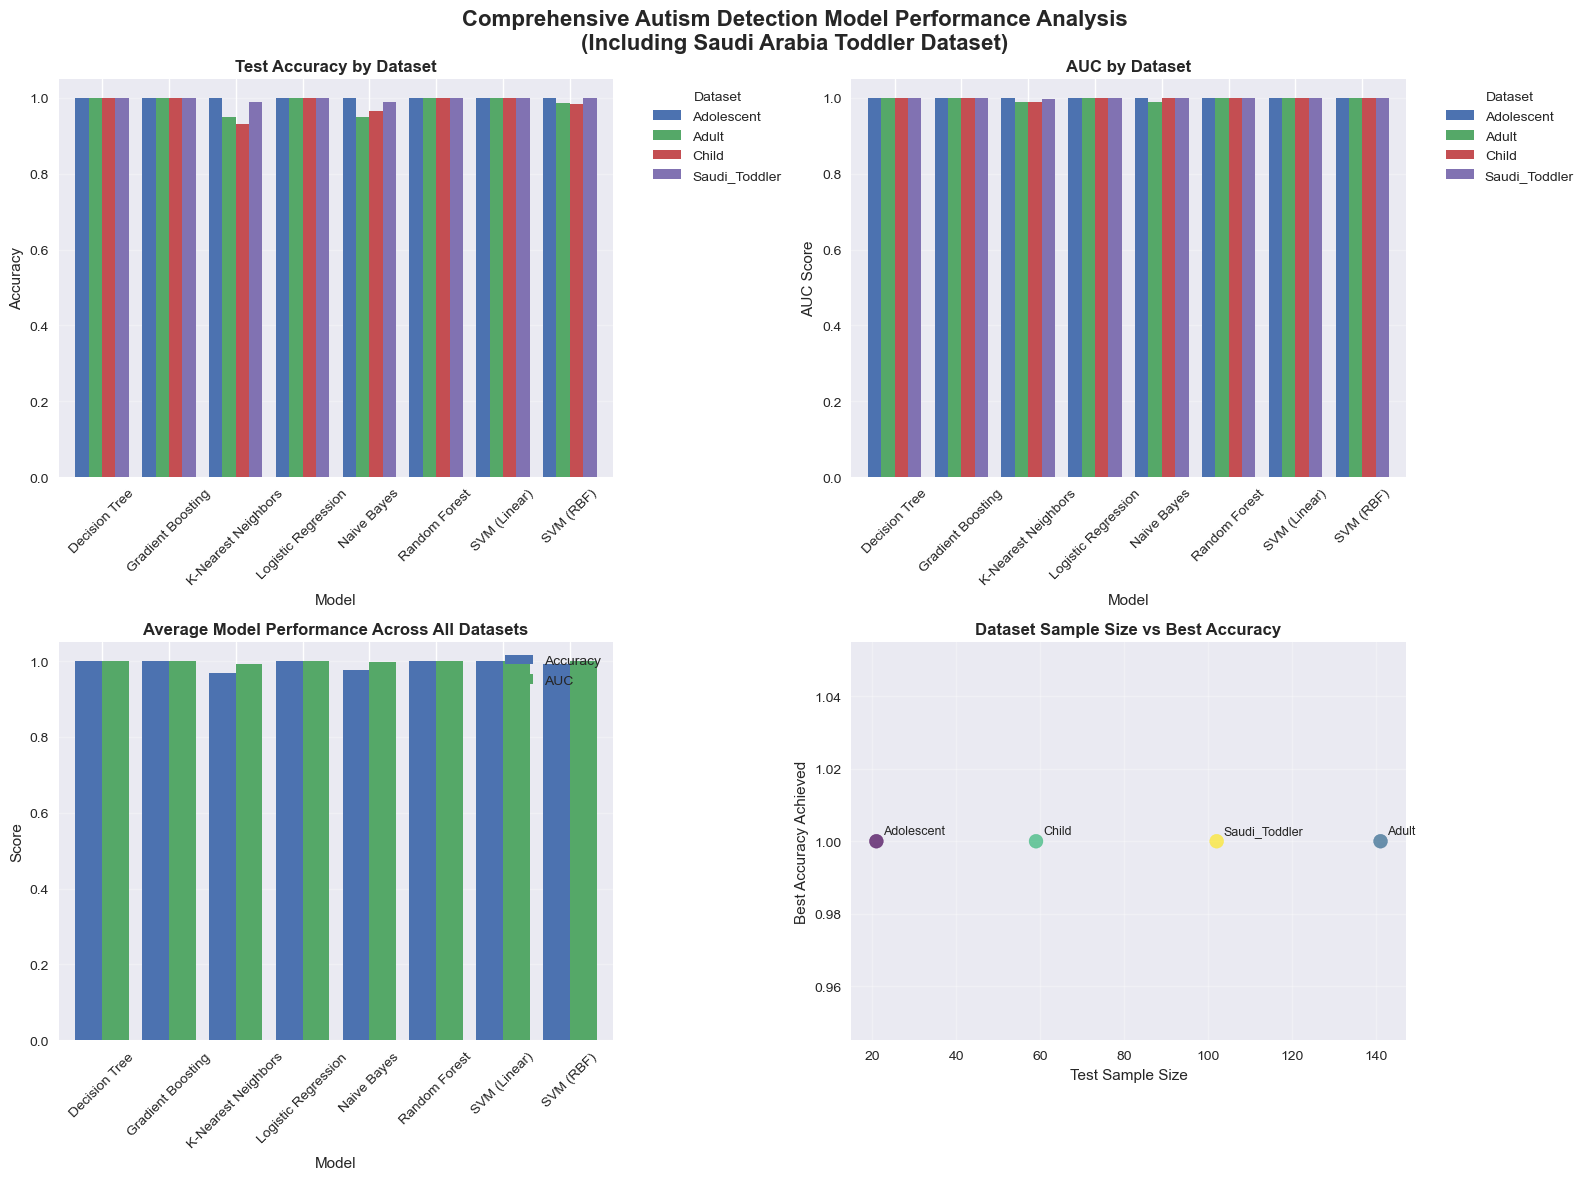

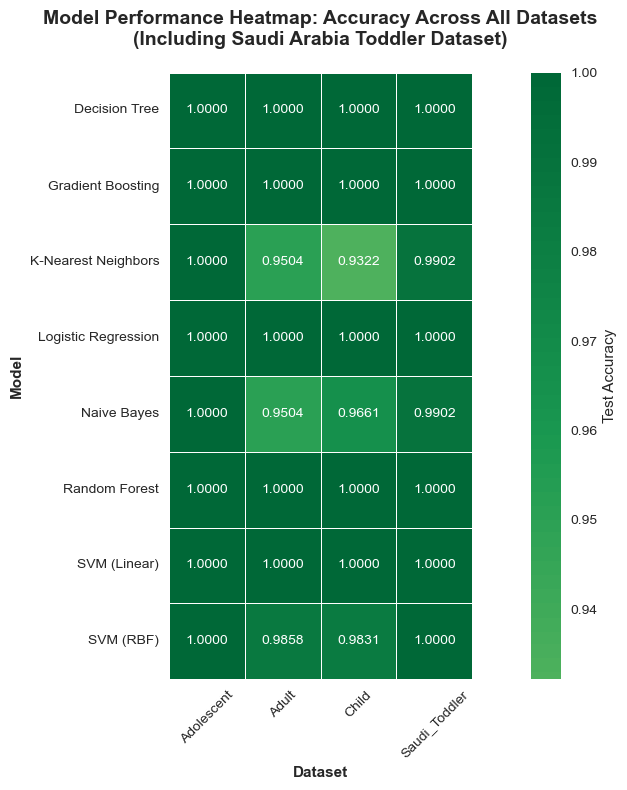


KEY INSIGHTS FROM COMPREHENSIVE ANALYSIS
🔄 Most Consistent Model: Decision Tree (std: 0.0000)
📊 Least Consistent Model: K-Nearest Neighbors (std: 0.0322)
✅ Easiest Dataset: Adolescent (avg accuracy: 1.0000)
🎯 Most Challenging Dataset: Child (avg accuracy: 0.9852)
🇸🇦 Saudi Dataset Performance:
   Average accuracy: 0.9975
   Best model: SVM (RBF) (1.0000)
   Performance rank: 2/4


In [26]:
# Create enhanced visualizations including Saudi dataset
import matplotlib.pyplot as plt
import seaborn as sns

if not results_df.empty:
    plt.style.use('seaborn-v0_8')  # Updated seaborn style
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Comprehensive Autism Detection Model Performance Analysis\n(Including Saudi Arabia Toddler Dataset)', 
                 fontsize=16, fontweight='bold')
    
    # 1. Accuracy comparison by dataset
    ax1 = axes[0, 0]
    accuracy_pivot = results_df.pivot(index='Model', columns='Dataset', values='Test_Accuracy')
    accuracy_pivot.plot(kind='bar', ax=ax1, width=0.8)
    ax1.set_title('Test Accuracy by Dataset', fontweight='bold')
    ax1.set_ylabel('Accuracy')
    ax1.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(axis='y', alpha=0.3)
    
    # 2. AUC comparison by dataset
    ax2 = axes[0, 1]
    auc_pivot = results_df.pivot(index='Model', columns='Dataset', values='AUC')
    auc_pivot.plot(kind='bar', ax=ax2, width=0.8)
    ax2.set_title('AUC by Dataset', fontweight='bold')
    ax2.set_ylabel('AUC Score')
    ax2.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    ax2.grid(axis='y', alpha=0.3)
    
    # 3. Model comparison across all datasets (average performance)
    ax3 = axes[1, 0]
    model_avg = results_df.groupby('Model')[['Test_Accuracy', 'AUC']].mean()
    model_avg.plot(kind='bar', ax=ax3, width=0.8)
    ax3.set_title('Average Model Performance Across All Datasets', fontweight='bold')
    ax3.set_ylabel('Score')
    ax3.legend(['Accuracy', 'AUC'])
    ax3.tick_params(axis='x', rotation=45)
    ax3.grid(axis='y', alpha=0.3)
    
    # 4. Dataset complexity comparison (sample size vs best accuracy)
    ax4 = axes[1, 1]
    dataset_summary = results_df.groupby('Dataset').agg({
        'Test_Accuracy': 'max',
        'Sample_Size': 'first'
    }).reset_index()
    
    scatter = ax4.scatter(dataset_summary['Sample_Size'], dataset_summary['Test_Accuracy'], 
                         s=100, alpha=0.7, c=range(len(dataset_summary)), cmap='viridis')
    
    for i, dataset in enumerate(dataset_summary['Dataset']):
        ax4.annotate(dataset, 
                    (dataset_summary.iloc[i]['Sample_Size'], dataset_summary.iloc[i]['Test_Accuracy']),
                    xytext=(5, 5), textcoords='offset points', fontsize=9)
    
    ax4.set_title('Dataset Sample Size vs Best Accuracy', fontweight='bold')
    ax4.set_xlabel('Test Sample Size')
    ax4.set_ylabel('Best Accuracy Achieved')
    ax4.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Create a heatmap for detailed comparison
    plt.figure(figsize=(12, 8))
    
    # Prepare data for heatmap
    heatmap_data = results_df.pivot(index='Model', columns='Dataset', values='Test_Accuracy')
    
    # Create heatmap
    sns.heatmap(heatmap_data, annot=True, fmt='.4f', cmap='RdYlGn', 
                center=0.8, square=True, linewidths=0.5,
                cbar_kws={'label': 'Test Accuracy'})
    
    plt.title('Model Performance Heatmap: Accuracy Across All Datasets\n(Including Saudi Arabia Toddler Dataset)', 
              fontsize=14, fontweight='bold', pad=20)
    plt.xlabel('Dataset', fontweight='bold')
    plt.ylabel('Model', fontweight='bold')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    # Print key insights
    print(f"\n{'='*80}")
    print("KEY INSIGHTS FROM COMPREHENSIVE ANALYSIS")
    print(f"{'='*80}")
    
    # Model consistency analysis
    model_std = results_df.groupby('Model')['Test_Accuracy'].std().sort_values()
    most_consistent = model_std.index[0]
    least_consistent = model_std.index[-1]
    
    print(f"🔄 Most Consistent Model: {most_consistent} (std: {model_std.iloc[0]:.4f})")
    print(f"📊 Least Consistent Model: {least_consistent} (std: {model_std.iloc[-1]:.4f})")
    
    # Dataset difficulty analysis
    dataset_avg_acc = results_df.groupby('Dataset')['Test_Accuracy'].mean().sort_values(ascending=False)
    easiest_dataset = dataset_avg_acc.index[0]
    hardest_dataset = dataset_avg_acc.index[-1]
    
    print(f"✅ Easiest Dataset: {easiest_dataset} (avg accuracy: {dataset_avg_acc.iloc[0]:.4f})")
    print(f"🎯 Most Challenging Dataset: {hardest_dataset} (avg accuracy: {dataset_avg_acc.iloc[-1]:.4f})")
    
    # Saudi dataset specific insights
    if 'Saudi_Toddler' in results_df['Dataset'].values:
        saudi_results = results_df[results_df['Dataset'] == 'Saudi_Toddler']
        saudi_avg = saudi_results['Test_Accuracy'].mean()
        saudi_best = saudi_results['Test_Accuracy'].max()
        saudi_best_model = saudi_results.loc[saudi_results['Test_Accuracy'].idxmax(), 'Model']
        
        print(f"🇸🇦 Saudi Dataset Performance:")
        print(f"   Average accuracy: {saudi_avg:.4f}")
        print(f"   Best model: {saudi_best_model} ({saudi_best:.4f})")
        print(f"   Performance rank: {list(dataset_avg_acc.index).index('Saudi_Toddler') + 1}/{len(dataset_avg_acc)}")

else:
    print("No results available for visualization")

In [27]:
# Create summary tables by dataset
if not results_df.empty:
    print(f"\n{'='*80}")
    print("SUMMARY TABLES BY DATASET")
    print(f"{'='*80}")
    
    for dataset in results_df['Dataset'].unique():
        dataset_results = results_df[results_df['Dataset'] == dataset]
        
        print(f"\n📋 {dataset.upper()} DATASET SUMMARY:")
        summary_cols = ['Model', 'Test_Accuracy', 'Precision', 'Recall', 'Specificity', 'AUC', 'CV_Mean']
        summary_table = dataset_results[summary_cols].sort_values('Test_Accuracy', ascending=False)
        print(summary_table.round(4).to_string(index=False))
    
    # Create a pivot table for easy comparison
    print(f"\n{'='*80}")
    print("ACCURACY COMPARISON MATRIX")
    print(f"{'='*80}")
    
    accuracy_pivot = results_df.pivot(index='Model', columns='Dataset', values='Test_Accuracy')
    print(accuracy_pivot.round(4).fillna('-'))
    
    print(f"\n{'='*80}")
    print("AUC COMPARISON MATRIX")
    print(f"{'='*80}")
    
    auc_pivot = results_df.pivot(index='Model', columns='Dataset', values='AUC')
    print(auc_pivot.round(4).fillna('-'))


SUMMARY TABLES BY DATASET

📋 CHILD DATASET SUMMARY:
              Model  Test_Accuracy  Precision  Recall  Specificity    AUC  CV_Mean
       SVM (Linear)         1.0000     1.0000     1.0       1.0000 1.0000   1.0000
      Random Forest         1.0000     1.0000     1.0       1.0000 1.0000   1.0000
Logistic Regression         1.0000     1.0000     1.0       1.0000 1.0000   0.9957
  Gradient Boosting         1.0000     1.0000     1.0       1.0000 1.0000   1.0000
      Decision Tree         1.0000     1.0000     1.0       1.0000 1.0000   1.0000
          SVM (RBF)         0.9831     0.9655     1.0       0.9677 1.0000   0.9786
        Naive Bayes         0.9661     0.9333     1.0       0.9355 1.0000   0.9397
K-Nearest Neighbors         0.9322     0.8750     1.0       0.8710 0.9885   0.8886

📋 ADOLESCENT DATASET SUMMARY:
              Model  Test_Accuracy  Precision  Recall  Specificity  AUC  CV_Mean
          SVM (RBF)            1.0        1.0     1.0          1.0  1.0   0.9147
       

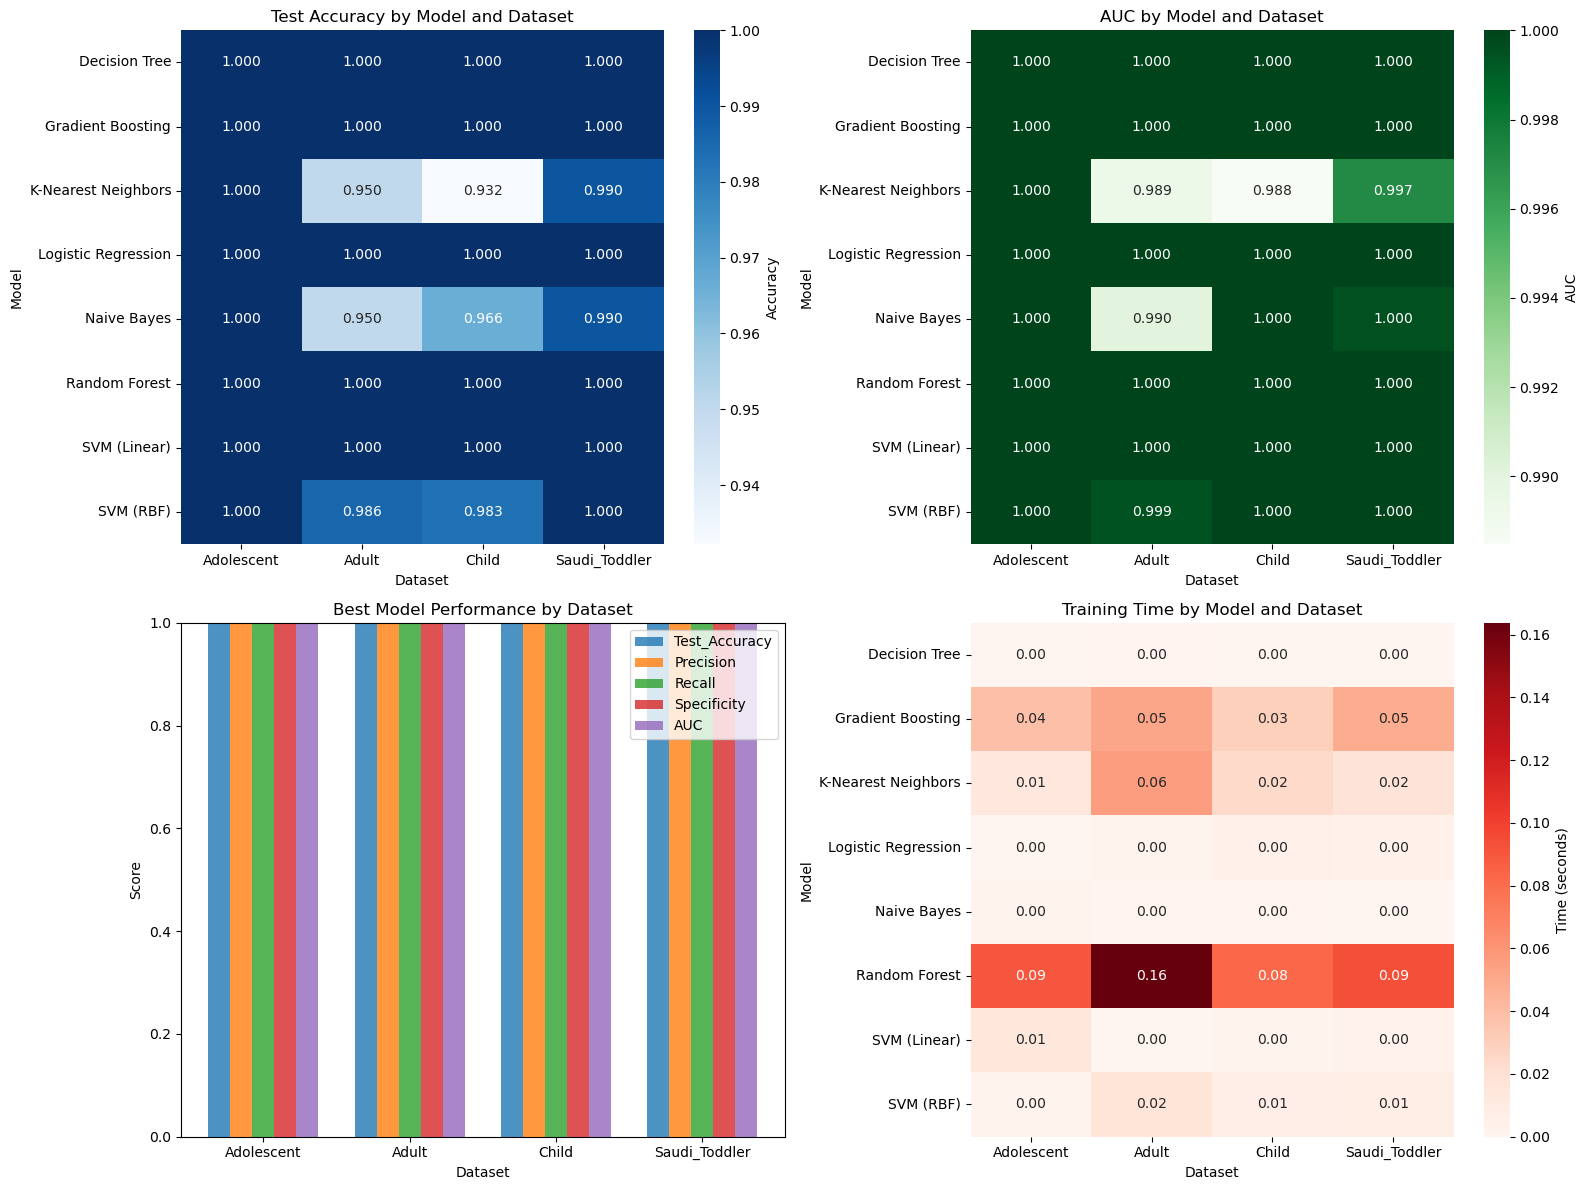

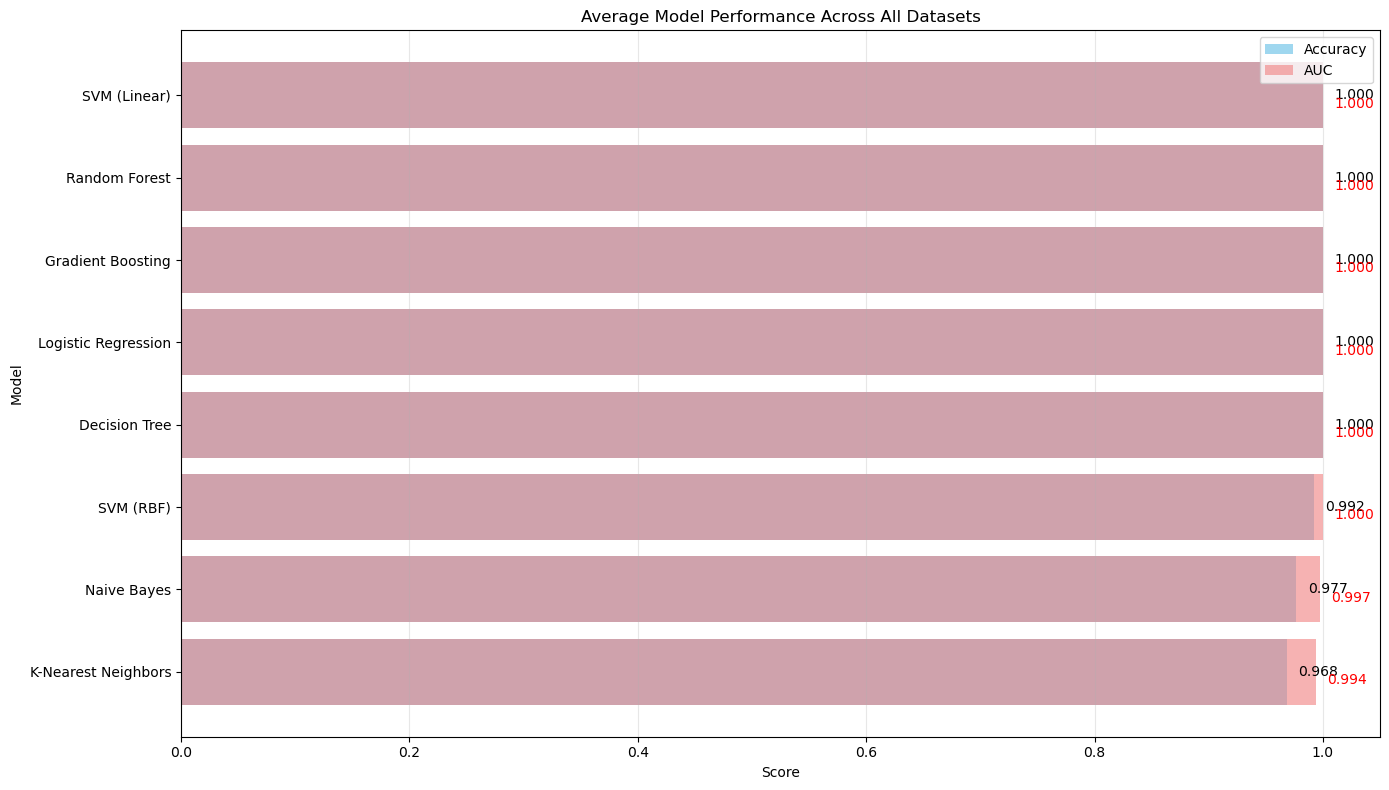

In [28]:
# Visualize the results
if not results_df.empty:
    # Set up the plotting style
    plt.style.use('default')
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Accuracy comparison by dataset
    accuracy_pivot = results_df.pivot(index='Model', columns='Dataset', values='Test_Accuracy')
    sns.heatmap(accuracy_pivot, annot=True, fmt='.3f', cmap='Blues', 
                ax=axes[0, 0], cbar_kws={'label': 'Accuracy'})
    axes[0, 0].set_title('Test Accuracy by Model and Dataset')
    axes[0, 0].set_xlabel('Dataset')
    axes[0, 0].set_ylabel('Model')
    
    # 2. AUC comparison by dataset
    auc_pivot = results_df.pivot(index='Model', columns='Dataset', values='AUC')
    sns.heatmap(auc_pivot, annot=True, fmt='.3f', cmap='Greens', 
                ax=axes[0, 1], cbar_kws={'label': 'AUC'})
    axes[0, 1].set_title('AUC by Model and Dataset')
    axes[0, 1].set_xlabel('Dataset')
    axes[0, 1].set_ylabel('Model')
    
    # 3. Performance metrics comparison (best models only)
    best_models = results_df.loc[results_df.groupby('Dataset')['Test_Accuracy'].idxmax()]
    metrics_cols = ['Test_Accuracy', 'Precision', 'Recall', 'Specificity', 'AUC']
    
    x_pos = np.arange(len(best_models))
    width = 0.15
    
    for i, metric in enumerate(metrics_cols):
        axes[1, 0].bar(x_pos + i*width, best_models[metric], 
                       width, label=metric, alpha=0.8)
    
    axes[1, 0].set_xlabel('Dataset')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].set_title('Best Model Performance by Dataset')
    axes[1, 0].set_xticks(x_pos + width*2)
    axes[1, 0].set_xticklabels(best_models['Dataset'])
    axes[1, 0].legend()
    axes[1, 0].set_ylim(0, 1)
    
    # 4. Training time comparison
    if 'Training_Time' in results_df.columns:
        time_pivot = results_df.pivot(index='Model', columns='Dataset', values='Training_Time')
        sns.heatmap(time_pivot, annot=True, fmt='.2f', cmap='Reds', 
                    ax=axes[1, 1], cbar_kws={'label': 'Time (seconds)'})
        axes[1, 1].set_title('Training Time by Model and Dataset')
        axes[1, 1].set_xlabel('Dataset')
        axes[1, 1].set_ylabel('Model')
    
    plt.tight_layout()
    plt.show()
    
    # Additional bar plot for model ranking
    plt.figure(figsize=(14, 8))
    
    # Calculate average performance across datasets
    avg_performance = results_df.groupby('Model').agg({
        'Test_Accuracy': 'mean',
        'AUC': 'mean',
        'Precision': 'mean',
        'Recall': 'mean'
    }).round(4)
    
    avg_performance = avg_performance.sort_values('Test_Accuracy', ascending=True)
    
    # Create horizontal bar plot
    y_pos = np.arange(len(avg_performance))
    
    plt.barh(y_pos, avg_performance['Test_Accuracy'], alpha=0.8, color='skyblue', label='Accuracy')
    plt.barh(y_pos, avg_performance['AUC'], alpha=0.6, color='lightcoral', label='AUC')
    
    plt.xlabel('Score')
    plt.ylabel('Model')
    plt.title('Average Model Performance Across All Datasets')
    plt.yticks(y_pos, avg_performance.index)
    plt.legend()
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, (acc, auc) in enumerate(zip(avg_performance['Test_Accuracy'], avg_performance['AUC'])):
        plt.text(acc + 0.01, i, f'{acc:.3f}', va='center')
        plt.text(auc + 0.01, i - 0.1, f'{auc:.3f}', va='center', color='red')
    
    plt.tight_layout()
    plt.show()

else:
    print("No results to visualize")